
# Практическая работа 4-2: Линейная регрессия 2

Name:

Email:


## ##  Анализ набора кредитных данных

Вспомните набор данных «Кредит», рассмотренный на занятии и доступный [здесь](http://www-bcf.usc.edu/~gareth/ISL/data.html).
Этот набор данных состоит из информации о кредитных картах 400 человек.

Сначала импортируйте данные и преобразуйте доход в тысячи.

In [2]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm     #Last lecture: used statsmodels.formula.api.ols() for OLS
from sklearn import linear_model         #Last lecture: used sklearn.linear_model.LinearRegression() for OLS

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Import data from Credit.csv file
from google.colab import files

uploaded = files.upload()
credit = pd.read_csv('Credit.csv',index_col=0) #load data
credit["Income"] = credit["Income"].map(lambda x: 1000*x)
credit

Saving Credit.csv to Credit.csv


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14891.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104593.0,7075,514,4,71,11,Male,No,No,Asian,580
4,148924.0,9504,681,3,36,11,Female,No,No,Asian,964
5,55882.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
396,12096.0,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13364.0,3838,296,5,65,17,Male,No,No,African American,480
398,57872.0,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37728.0,2525,192,1,44,13,Male,No,Yes,Caucasian,0


## Задание 1. Первая регрессионная модель

**Упражнение:** Лимит средств по рейтингу:


$$
\text{Limit} = \beta_0 + \beta_1 \text{Rating}.
$$

Поскольку кредитные рейтинги в основном используются банками для определения кредитных лимитов, ожидаем, что рейтинг будет в прямой зависимости для лимита, поэтому эта регрессия должна быть очень хорошей.

Используйте функцию `ols` из библиотеки Python `statsmodels`. Каково значение $R^2$? Что такое $H_0$ и $H_A$ для соответствующей проверки гипотезы и каково значение $p$?


In [3]:
# your code goes here
credit_rating_ols = sm.ols(formula="Limit ~ Rating", data=credit).fit()
credit_rating_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        12:01:51   Log-Likelihood:                -2649.1
No. Observations:                 400   AIC:                             5302.
Df Residuals:                     398   BIC:                             5310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -542.9282     22.850    -23.760      0.000    -587.851    -498.006
Rating        14.8716      0.059    251.949      0.000      14.756      14.988
==============================================================================
Omnibus:                        6.887   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.980
Skew:                          -0.145   Prob(JB):                       0.0829
Kurtosis:                       2.537   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Ваш ответ: $R^2 = 0.994$**

## Задание 2: Прогнозирование лимита без рейтинга

Поскольку `Рейтинг` и `Лимит` — это практически одна и та же переменная, исключим `Рейтинг` и просто попробуем спрогнозировать `Лимит` на основе вещественнозначных переменных (некатегориальных переменных): Доход, Карты, Возраст, Образование, Баланс.

**Упражнение.** Разработайте модель множественной линейной регрессии для прогнозирования рейтинга. Интерпретируйте результаты.

А пока просто сосредоточьтесь на переменных с численными значениями (доход, карты, возраст, образование, баланс).

В первом приближении не использовать категориальные переменные (Пол, Студент, Семейное положение, Этническая принадлежность).



**Model:**
$$
Лимит = \beta_0 + \beta_1 * Доход + \beta_2*Карты + \beta_3*Возраст + \beta_4*Образование + \beta_3*Баланс  .
$$

In [4]:
credit_rating_ols = sm.ols(formula="Limit ~ Income + Cards + Age + Education + Balance", data=credit).fit()
credit_rating_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1242.
Date:                Sat, 11 May 2024   Prob (F-statistic):          1.32e-238
Time:                        12:01:54   Log-Likelihood:                -3101.0
No. Observations:                 400   AIC:                             6214.
Df Residuals:                     394   BIC:                             6238.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1752.3883    170.621     10.271      0.000    1416.947    2087.830
Income         0.0323      0.001     34.737      0.000       0.031       0.034
Cards        -61.7552     20.904     -2.954      0.003    -102.852     -20.658
Age            1.9710      1.683      1.171      0.242      -1.337       5.279
Education     -4.9297      9.107     -0.541      0.589     -22.834      12.974
Balance        3.1921      0.070     45.291      0.000       3.053       3.331
==============================================================================
Omnibus:                       78.568   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.063
Skew:                          -1.356   Prob(JB):                     1.15e-27
Kurtosis:                       3.306   Cond. No.                     3.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

              Limit    Income       Age     Cards   Balance  Education
Limit      1.000000  0.792088  0.100888  0.010231  0.861697  -0.023549
Income     0.792088  1.000000  0.175338 -0.018273  0.463656  -0.027692
Age        0.100888  0.175338  1.000000  0.042948  0.001835   0.003619
Cards      0.010231 -0.018273  0.042948  1.000000  0.086456  -0.051084
Balance    0.861697  0.463656  0.001835  0.086456  1.000000  -0.008062
Education -0.023549 -0.027692  0.003619 -0.051084 -0.008062   1.000000


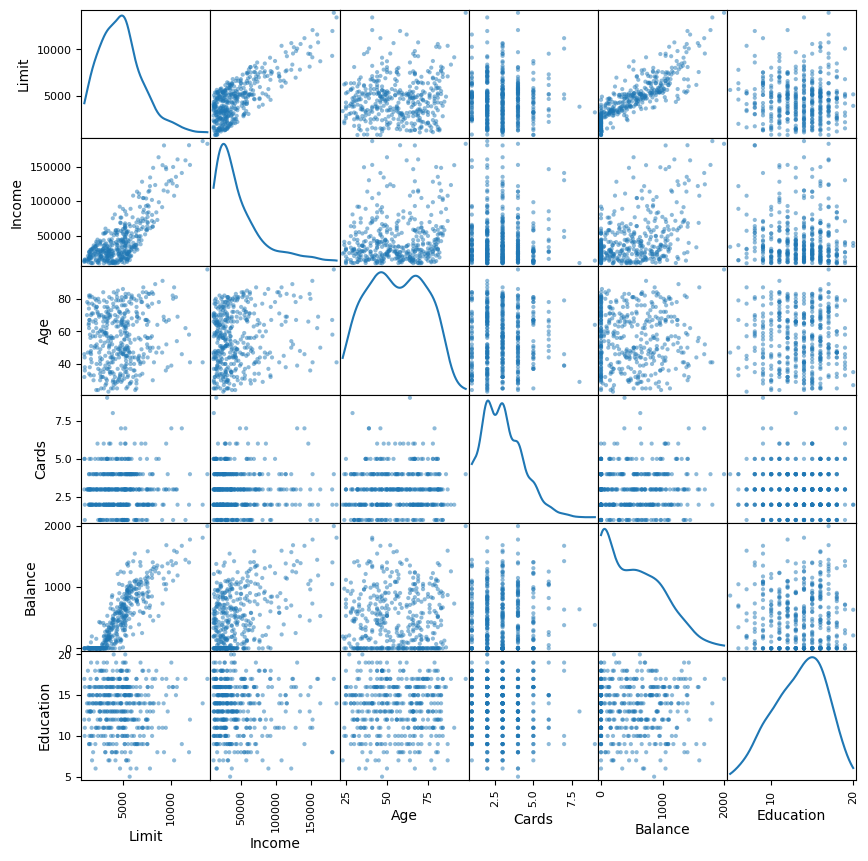

In [5]:
print(credit[['Limit', 'Income', 'Age', 'Cards', 'Balance', 'Education']].corr())
pd.plotting.scatter_matrix(credit[['Limit', 'Income', 'Age', 'Cards', 'Balance', 'Education']], figsize=(10, 10), diagonal='kde')
plt.show()

Корреляция между Доходом и Балансом составляет  0.46, что означает, что баланс состоит из дохода. Таким образом влияние баланса на лимит можно приписать доходам.

In [6]:
credit_ols = sm.ols(formula="Limit ~ Cards + Age + Education + Balance", data=credit).fit()
credit_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     308.5
Date:                Sat, 11 May 2024   Prob (F-statistic):          4.40e-120
Time:                        12:02:02   Log-Likelihood:                -3381.4
No. Observations:                 400   AIC:                             6773.
Df Residuals:                     395   BIC:                             6793.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2261.6523    342.194      6.609      0.000    1588.902    2934.402
Cards       -118.1764     41.953     -2.817      0.005    -200.655     -35.698
Age           13.7002      3.318      4.129      0.000       7.176      20.224
Education    -15.1503     18.323     -0.827      0.409     -51.173      20.872
Balance        4.3548      0.125     34.880      0.000       4.109       4.600
==============================================================================
Omnibus:                       17.394   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.252
Skew:                           0.372   Prob(JB):                     8.93e-06
Kurtosis:                       3.917   Cond. No.                     4.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

На данную модель приходится 76% дисперсии данных

In [7]:
limit1_ols = sm.ols(formula="Limit ~ Cards + Balance + Cards*Balance", data=credit).fit()
limit1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     389.4
Date:                Sat, 11 May 2024   Prob (F-statistic):          1.03e-117
Time:                        12:02:06   Log-Likelihood:                -3390.0
No. Observations:                 400   AIC:                             6788.
Df Residuals:                     396   BIC:                             6804.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2714.2384    219.559     12.362      0.000    2282.592    3145.885
Cards           -82.2601     68.976     -1.193      0.234    -217.864      53.344
Balance           4.4955      0.313     14.354      0.000       3.880       5.111
Cards:Balance    -0.0459      0.093     -0.494      0.622      -0.229       0.137
==============================================================================
Omnibus:                       20.211   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.045
Skew:                           0.407   Prob(JB):                     8.13e-07
Kurtosis:                       4.010   Cond. No.                     9.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$$
Лимит = \beta_0 + \beta_1 * Доход + \beta_2*Карты + \beta_3*Возраст + \beta_4*Образование + \beta_3*Баланс  .
$$

{'Intercept': 2714.238384786883, 'Cards': -82.26013005336108, 'Balance': 4.495453561930266, 'Cards:Balance': -0.045881207023244275}


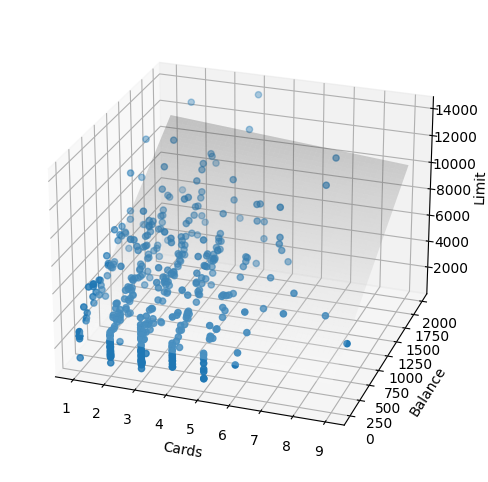

In [8]:
#Инициализация фигуры и осей для 3-D графика:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#Создание 3-D диаграммы рассеяния данных:
ax.scatter(xs=credit['Cards'], ys=credit['Balance'], zs=credit['Limit'])

#Построение поверхностного графика предсказанной переменной
x = np.linspace(credit['Cards'].min(), credit['Cards'].max(), 100)
y = np.linspace(credit['Balance'].min(), credit['Balance'].max(), 100)
X,Y = np.meshgrid(x,y) #Создание значений для независимых переменных
par = dict(limit1_ols.params) #Составление словаря из коэффициентов регрессионной модели
print(par)
Z = par["Intercept"] + par["Cards"]*X + par["Balance"]*Y + par["Cards:Balance"]*X*Y
surf = ax.plot_surface(X, Y, Z,cmap=cm.Greys, alpha=0.2) #alpha<1 делает график поверхности прозрачным

# Поворот и маркировка осей:
ax.view_init(25,-71)
ax.set_xlabel('Cards')
ax.set_ylabel('Balance')
ax.set_zlabel('Limit')

plt.show()

In [9]:
limit2_ols = sm.ols(formula="Limit ~ Age + Balance + Age*Balance", data=credit).fit()
limit2_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     416.9
Date:                Sat, 11 May 2024   Prob (F-statistic):          3.94e-122
Time:                        12:02:16   Log-Likelihood:                -3379.7
No. Observations:                 400   AIC:                             6767.
Df Residuals:                     396   BIC:                             6783.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2461.3992    290.638      8.469      0.000    1890.013    3032.786
Age             0.6374      4.949      0.129      0.898      -9.091      10.366
Balance         2.9727      0.413      7.190      0.000       2.160       3.785
Age:Balance     0.0239      0.007      3.429      0.001       0.010       0.038
==============================================================================
Omnibus:                       24.439   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.003
Skew:                           0.475   Prob(JB):                     4.13e-08
Kurtosis:                       4.066   Cond. No.                     2.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

{'Intercept': 2461.399158574988, 'Age': 0.6374119027984628, 'Balance': 2.972703443978809, 'Age:Balance': 0.023922951031354993}


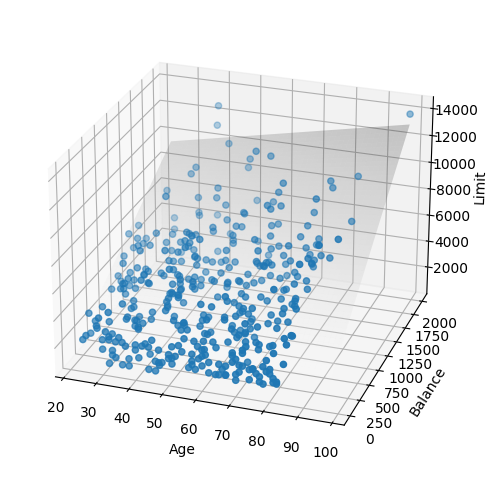

In [10]:
#Инициализация фигуры и осей для 3-D графика:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#Создание 3-D диаграммы рассеяния данных:
ax.scatter(xs=credit['Age'], ys=credit['Balance'], zs=credit['Limit'])

#Построение поверхностного графика предсказанной переменной
x = np.linspace(credit['Age'].min(), credit['Age'].max(), 100)
y = np.linspace(credit['Balance'].min(), credit['Balance'].max(), 100)
X,Y = np.meshgrid(x,y) #Создание значений для независимых переменных
par = dict(limit2_ols.params) #Составление словаря из коэффициентов регрессионной модели
print(par)
Z = par["Intercept"] + par["Age"]*X + par["Balance"]*Y + par["Age:Balance"]*X*Y
surf = ax.plot_surface(X, Y, Z,cmap=cm.Greys, alpha=0.2) #alpha<1 делает график поверхности прозрачным

# Поворот и маркировка осей:
ax.view_init(25,-71)
ax.set_xlabel('Age')
ax.set_ylabel('Balance')
ax.set_zlabel('Limit')

plt.show()

In [11]:
limit3_ols = sm.ols(formula="Limit ~ Age + Cards + Age*Cards", data=credit).fit()
limit3_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.946
Date:                Sat, 11 May 2024   Prob (F-statistic):              0.122
Time:                        12:02:22   Log-Likelihood:                -3661.8
No. Observations:                 400   AIC:                             7332.
Df Residuals:                     396   BIC:                             7348.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2927.7336    903.399      3.241      0.001    1151.675    4703.792
Age           32.3790     15.844      2.044      0.042       1.231      63.528
Cards        374.1969    289.162      1.294      0.196    -194.289     942.682
Age:Cards     -6.6482      5.050     -1.317      0.189     -16.576       3.280
==============================================================================
Omnibus:                       41.776   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.557
Skew:                           0.774   Prob(JB):                     1.42e-12
Kurtosis:                       3.937   Cond. No.                     1.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

{'Intercept': 2927.7336112587373, 'Age': 32.37904528142155, 'Cards': 374.19685832026965, 'Age:Cards': -6.648242215179402}


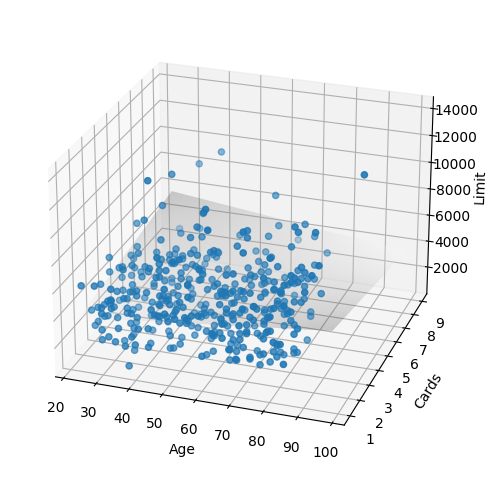

In [12]:
#Инициализация фигуры и осей для 3-D графика:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#Создание 3-D диаграммы рассеяния данных:
ax.scatter(xs=credit['Age'], ys=credit['Cards'], zs=credit['Limit'])

#Построение поверхностного графика предсказанной переменной
x = np.linspace(credit['Age'].min(), credit['Age'].max(), 100)
y = np.linspace(credit['Cards'].min(), credit['Cards'].max(), 100)
X,Y = np.meshgrid(x,y) #Создание значений для независимых переменных
par = dict(limit3_ols.params) #Составление словаря из коэффициентов регрессионной модели
print(par)
Z = par["Intercept"] + par["Age"]*X + par["Cards"]*Y + par["Age:Cards"]*X*Y
surf = ax.plot_surface(X, Y, Z,cmap=cm.Greys, alpha=0.2) #alpha<1 делает график поверхности прозрачным

# Поворот и маркировка осей:
ax.view_init(25,-71)
ax.set_xlabel('Age')
ax.set_ylabel('Cards')
ax.set_zlabel('Limit')

plt.show()

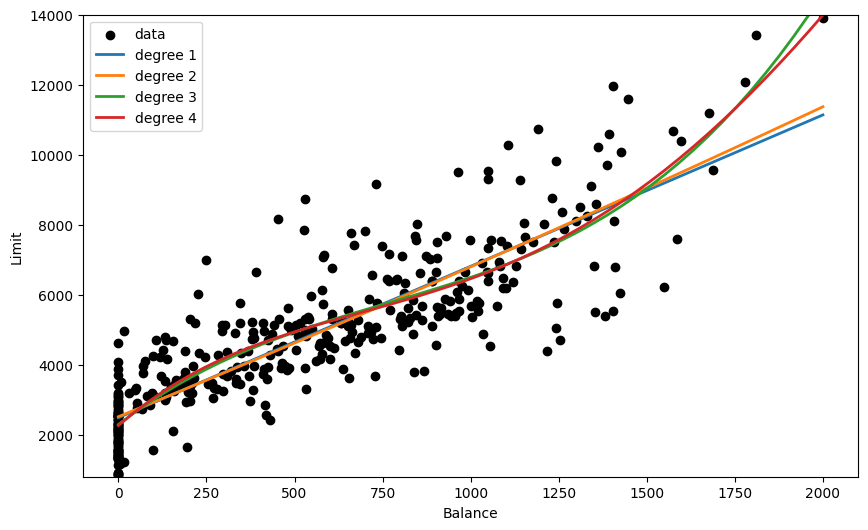

In [13]:
# fit polynomial models
mr1 = sm.ols(formula="Limit ~ Balance", data=credit).fit()
par1 = dict(mr1.params)
mr2 = sm.ols(formula="Limit ~ Balance + I(Balance ** 2.0)", data=credit).fit()
par2 = dict(mr2.params)
mr3 = sm.ols(formula="Limit ~ Balance + I(Balance ** 2.0) + I(Balance ** 3.0)", data=credit).fit()
par3 = dict(mr3.params)
mr4 = sm.ols(formula="Limit ~ Balance + I(Balance ** 2.0) + I(Balance ** 3.0) + I(Balance ** 4.0)", data=credit).fit()
par4 = dict(mr4.params)

# make scatterplot of data
plt.scatter(credit['Balance'],credit['Limit'],color='black',label="data")

# evaluate polynomial models on a grid
x = np.linspace(0,2000)
y1 = par1["Intercept"] + par1['Balance']*x
y2 = par2["Intercept"] + par2['Balance']*x + par2['I(Balance ** 2.0)']*x**2
y3 = par3["Intercept"] + par3['Balance']*x + par3['I(Balance ** 2.0)']*x**2 + par3['I(Balance ** 3.0)']*x**3
y4 = par4["Intercept"] + par4['Balance']*x + par4['I(Balance ** 2.0)']*x**2 + par4['I(Balance ** 3.0)']*x**3 + par4['I(Balance ** 4.0)']*x**4

# plot polynomial models
plt.plot(x,y1,label="degree 1",linewidth=2)
plt.plot(x,y2,label="degree 2",linewidth=2)
plt.plot(x,y3,label="degree 3",linewidth=2)
plt.plot(x,y4,label="degree 4",linewidth=2)
plt.legend()
plt.xlabel('Balance'); plt.ylabel('Limit')
plt.ylim((800,14000))
plt.show()

In [14]:
print('mr1:',mr1.rsquared)
print('mr2:',mr2.rsquared)
print('mr3:',mr3.rsquared)
print('mr4:',mr4.rsquared)

mr1: 0.7425221799818014
mr2: 0.7427252781330149
mr3: 0.7620296380884277
mr4: 0.7626801634867344


Какие независимые переменные являются хорошими/плохими предикторами? Какая модель в целом является лучшей?

**Ваш ответ: хорошим предикатором является Balance**


## Задание 3. Включение категориальных переменных в модель регрессии

Рассмотреть двоичные категориальные переменные, которые были ранее сопоставлены с целочисленными значениями 0, 1 в в `лекции 4.2`.

In [15]:
credit["Gender_num"] = credit["Gender"].map({' Male':0, 'Female':1})
credit["Student_num"] = credit["Student"].map({'Yes':1, 'No':0})
credit["Married_num"] = credit["Married"].map({'Yes':1, 'No':0})


Можете ли улучшить модель, которая разработана в задании `2`, включив в нее одну или несколько из этих переменных?


In [16]:
# your code here
dummy = pd.get_dummies(credit['Ethnicity'])
credit = pd.concat([credit,dummy],axis=1)
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Gender_num,Student_num,Married_num,African American,Asian,Caucasian
1,14891.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,1,False,False,True
2,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1,1,1,False,True,False
3,104593.0,7075,514,4,71,11,Male,No,No,Asian,580,0,0,0,False,True,False
4,148924.0,9504,681,3,36,11,Female,No,No,Asian,964,1,0,0,False,True,False
5,55882.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,12096.0,4100,307,3,32,13,Male,No,Yes,Caucasian,560,0,0,1,False,False,True
397,13364.0,3838,296,5,65,17,Male,No,No,African American,480,0,0,0,True,False,False
398,57872.0,4171,321,5,67,12,Female,No,Yes,Caucasian,138,1,0,1,False,False,True
399,37728.0,2525,192,1,44,13,Male,No,Yes,Caucasian,0,0,0,1,False,False,True


In [17]:
credit1 = credit.copy()
credit1 = credit1.drop(['Gender', 'Married', 'Student', 'Ethnicity'], axis=1)

In [18]:
credit1.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_num,Student_num,Married_num,African American,Asian,Caucasian
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656,-0.010738,0.019632,0.035652,0.040132,-0.017137,-0.019701
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697,0.009397,-0.006015,0.031155,0.036320,-0.032427,-0.003081
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625,0.008885,-0.002028,0.036751,0.037598,-0.035999,-0.001070
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456,-0.022658,-0.026164,-0.009695,0.000878,0.005591,-0.005631
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835,0.004015,-0.029844,-0.073136,0.061169,-0.059623,-0.000822
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062,-0.005049,0.072085,0.048911,0.013827,0.029586,-0.037725
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000,0.021474,0.259018,-0.005673,0.013720,-0.009812,-0.003288
Gender_num,-0.010738,0.009397,0.008885,-0.022658,0.004015,-0.005049,0.021474,1.000000,0.055034,0.012452,-0.014288,0.025425,-0.009831
Student_num,0.019632,-0.006015,-0.002028,-0.026164,-0.029844,0.072085,0.259018,0.055034,1.000000,-0.076974,0.001931,0.053534,-0.048334
Married_num,0.035652,0.031155,0.036751,-0.009695,-0.073136,0.048911,-0.005673,0.012452,-0.076974,1.000000,-0.102707,0.088595,0.011418


**Ваш ответ:**